In [1]:
# specify test dataset directory
predict_img_dir = 'predict_img/images'

# Nature Image Classification (Multi-labels)

## Objective 
To learn tags given to each image.  
There are 5 tags;  
- desert  
- mountains  
- sea  
- sunset  
- trees  

## Dataset
source : https://www.dropbox.com/s/0htmeoie69q650p/miml_dataset.zip?dl=0  
(You can follow the tutorial in this blog https://vijayabhaskar96.medium.com/multi-label-image-classification-tutorial-with-keras-imagedatagenerator-cd541f8eaf24)

## Make Prediction
From the performance of 3 model development 
- vgg-block model : 0.72592944
- pre-trained VGG16 model : 0.80617976
- pre-trained ResNet50 : 0.84483045

I choose the model with pre-trained Keras ResNet50 model as a feature extractor to make a prediction.

### Load the model

In [2]:
model_name = 'best_pretrained_ResNet50.h5'

In [3]:
from tensorflow.keras.models import load_model
import os

In [4]:
model = load_model(os.path.join(project_dir, model_name))

In [5]:
# see model summary
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

### Load label dict from json file

In [6]:
import json

In [7]:
labels_map = json.load(open(project_dir+'/labels_map.json'))
labels_map

{'desert': 0, 'mountains': 1, 'sea': 2, 'sunset': 3, 'trees': 4}

In [8]:
inv_labels_map = json.load(open(project_dir+'/inv_labels_map.json'))
inv_labels_map

{'0': 'desert', '1': 'mountains', '2': 'sea', '3': 'sunset', '4': 'trees'}

### Create img-label mapping of prediction

In [16]:
import pandas as pd

In [19]:
# load mapping csv file

labels_path = os.path.join(project_dir,'predict_img/labels.csv')
mapping_df = pd.read_csv(labels_path,  index_col='Filenames')
mapping_df

,labels
Filenames,
100.jpg,"desert,sunset"
200.jpg,desert
300.jpg,desert
400.jpg,desert
500.jpg,mountains
600.jpg,mountains
700.jpg,"mountains,trees"
800.jpg,mountains
900.jpg,sea


In [22]:
# make a dictionary
mapping = mapping_df.to_dict()['labels']
mapping

{'100.jpg': 'desert,sunset',
 '1000.jpg': 'sea',
 '1100.jpg': 'sea',
 '1200.jpg': 'sea',
 '1300.jpg': 'mountains,sunset,trees',
 '1400.jpg': 'sea,sunset',
 '1500.jpg': 'sea,sunset',
 '1600.jpg': 'sea,sunset',
 '1700.jpg': 'trees',
 '1800.jpg': 'trees',
 '1900.jpg': 'trees',
 '200.jpg': 'desert',
 '2000.jpg': 'trees',
 '300.jpg': 'desert',
 '400.jpg': 'desert',
 '500.jpg': 'mountains',
 '600.jpg': 'mountains',
 '700.jpg': 'mountains,trees',
 '800.jpg': 'mountains',
 '900.jpg': 'sea'}

### Load image for making prediction

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet import preprocess_input

In [12]:
# let's see images we have
os.listdir(predict_img_dir)

['800.jpg',
 '1600.jpg',
 '1700.jpg',
 '1200.jpg',
 '1000.jpg',
 '1900.jpg',
 '1500.jpg',
 '1100.jpg',
 '1400.jpg',
 '300.jpg',
 '400.jpg',
 '100.jpg',
 '1800.jpg',
 '900.jpg',
 '200.jpg',
 '2000.jpg',
 '1300.jpg',
 '700.jpg',
 '500.jpg',
 '600.jpg']

In [13]:
# get random image
img_name = os.listdir(predict_img_dir)[np.random.randint(len(os.listdir(predict_img_dir)))]
img_name

'700.jpg'

File name :  700.jpg


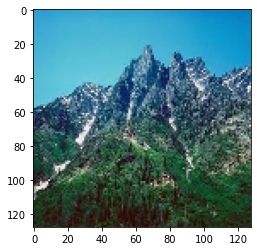

image labels :  mountains,trees


In [24]:
# load image with target size = (128, 128)
original_img = load_img(predict_img_dir+'/'+img_name, target_size=(128,128))

# plot image
print('File name : ', img_name)
plt.imshow(original_img)
plt.show()
print('image labels : ', mapping[img_name])

### Image preprocessing for ResNet50 input

In [25]:
# convert img to array
img = img_to_array(original_img)
img.shape

(128, 128, 3)

In [26]:
# reshape image to be a single sample with 3 chanels
img = img.reshape(1, 128, 128, 3)
img.shape

(1, 128, 128, 3)

In [27]:
# chang type to float32
img = img.astype('float32')
img.dtype

dtype('float32')

In [28]:
# center pixel data as for pretrained ResNet50
img = preprocess_input(img)

### Make prediction

In [39]:
result = model.predict(img)
result = result.round()
result

array([[0., 1., 0., 0., 1.]], dtype=float32)

In [46]:
# convert result to labels
predicted_label = [inv_labels_map[str(i)] for i in range(len(result[0])) if result[0][i] == 1.0]
predicted_label

['mountains', 'trees']

File name :  700.jpg


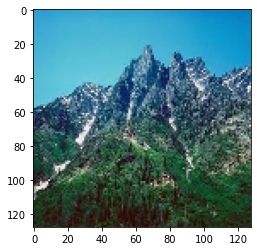

image labels :  mountains,trees
Prediction result :  ['mountains', 'trees']


In [48]:
# show the prediction
print('File name : ', img_name)
plt.imshow(original_img)
plt.show()
print('image labels : ', mapping[img_name])
print('Prediction result : ', predicted_label)

### Make prediction of all images in the folder

In [49]:
# let's see images we have
os.listdir(predict_img_dir)

['800.jpg',
 '1600.jpg',
 '1700.jpg',
 '1200.jpg',
 '1000.jpg',
 '1900.jpg',
 '1500.jpg',
 '1100.jpg',
 '1400.jpg',
 '300.jpg',
 '400.jpg',
 '100.jpg',
 '1800.jpg',
 '900.jpg',
 '200.jpg',
 '2000.jpg',
 '1300.jpg',
 '700.jpg',
 '500.jpg',
 '600.jpg']

In [51]:
img_list = list()

for img in os.listdir(predict_img_dir):
  # load image with target size = (128, 128)
  img = load_img(predict_img_dir+'/'+img, target_size=(128,128))
  # convert img to array
  img = img_to_array(img)
  # append image array to image list
  img_list.append(img)

# convert image list to array
img_array = np.array(img_list)
# change dtype to float32
img_array = img_array.astype('float32')
# preprocess images to be ResNet50 input
img_array = preprocess_input(img_array)

# print shape
img_array.shape

(20, 128, 128, 3)

In [52]:
# make batch prediction
results = model.predict(img_array)
results

array([[1.11353375e-01, 2.97321081e-01, 5.93689322e-01, 1.35508366e-02,
        1.93447560e-01],
       [1.50967366e-03, 1.15957158e-03, 9.38484073e-01, 9.99714196e-01,
        1.11575913e-08],
       [8.54867026e-02, 3.00888777e-01, 1.07132316e-01, 3.88208367e-02,
        8.18946719e-01],
       [5.00671752e-03, 1.24218436e-02, 8.48208308e-01, 1.03557168e-05,
        9.00463294e-03],
       [1.89748345e-04, 5.45964169e-04, 9.98407304e-01, 4.94741492e-08,
        3.26274812e-06],
       [8.66070380e-08, 6.43922773e-04, 6.31003561e-09, 5.25397947e-10,
        1.00000000e+00],
       [3.38363973e-03, 6.03080355e-03, 5.50367355e-01, 9.99368370e-01,
        1.55814821e-04],
       [1.35672158e-02, 3.09053566e-02, 9.44404840e-01, 5.97770086e-05,
        4.65514790e-03],
       [1.14349532e-03, 4.00863681e-03, 5.90030789e-01, 9.99024868e-01,
        1.74542845e-04],
       [9.97245669e-01, 1.04513429e-02, 4.63856012e-03, 5.53471362e-03,
        7.98738282e-03],
       [9.98814344e-01, 5.8868

In [56]:
results = results.round()
results

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [60]:
predicted_labels = []
for result in results:
  predicted_label = [inv_labels_map[str(i)] for i in range(len(result)) if result[i] == 1.0]
  predicted_labels.append(predicted_label)

predicted_labels

[['sea'],
 ['sea', 'sunset'],
 ['trees'],
 ['sea'],
 ['sea'],
 ['trees'],
 ['sea', 'sunset'],
 ['sea'],
 ['sea', 'sunset'],
 ['desert'],
 ['desert'],
 ['sunset'],
 ['trees'],
 ['sea'],
 ['desert'],
 ['trees'],
 ['sunset', 'trees'],
 ['mountains', 'trees'],
 ['mountains'],
 ['mountains']]

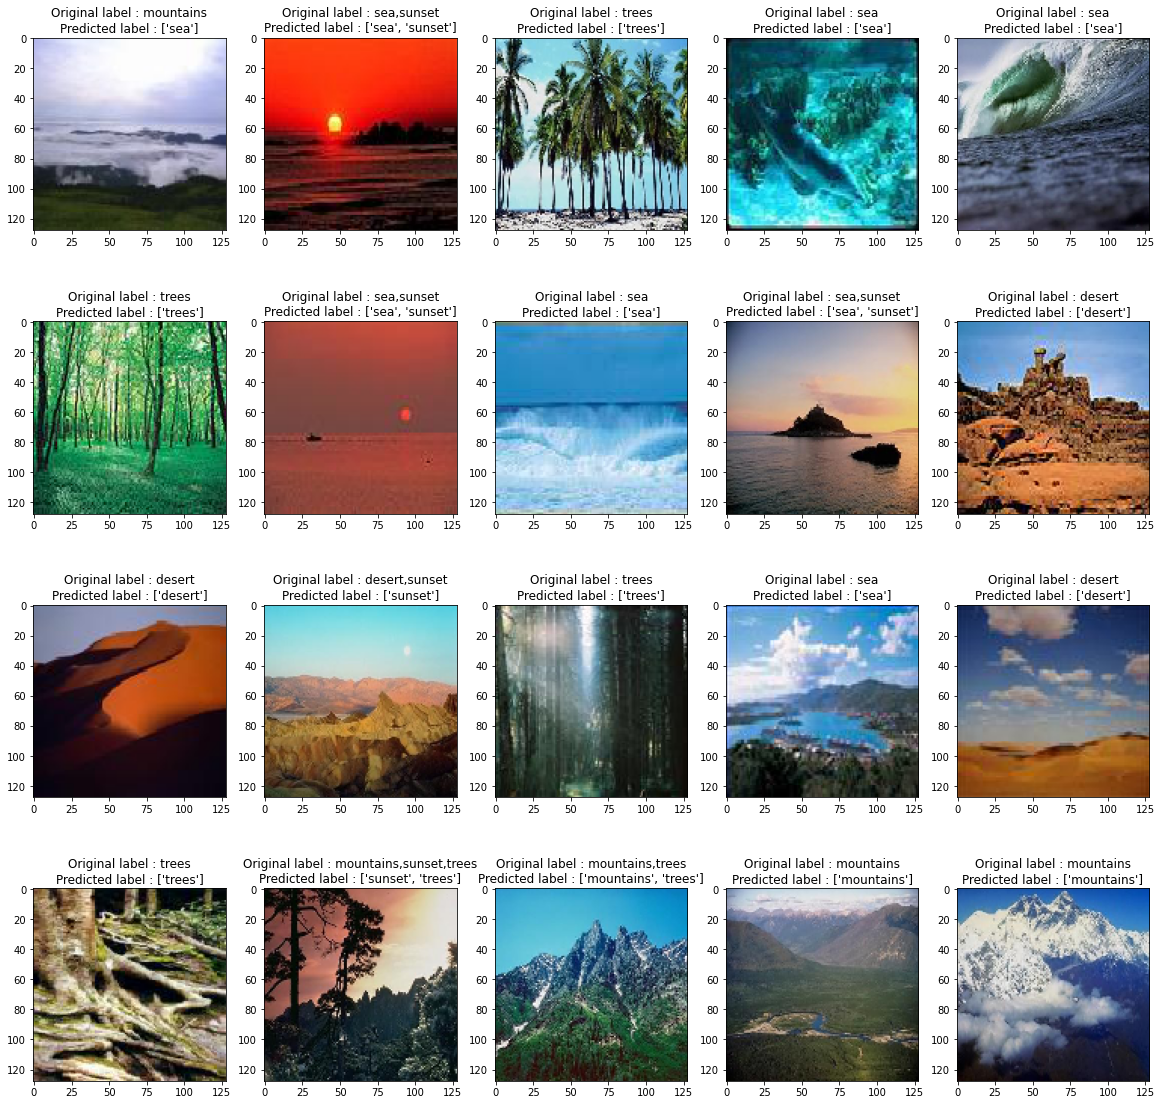

In [71]:
# plot images along with their prediction
fig = plt.figure(figsize=(20,20))
for i,image in enumerate(os.listdir(predict_img_dir)):
  img = load_img(predict_img_dir+'/'+image, target_size=(128,128))
  fig.add_subplot(4,5, i+1)
  plt.imshow(img)
  plt.title('Original label : '+mapping[image]+'\nPredicted label : '+str(predicted_labels[i]))

#fig.tight_layout()
plt.show()

The model can predict 17 out of 20 correctly.